# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

## Context

![img](./diamonds.jpg)

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

In this lab we will first explore our dataset to better understand the data we have and then try to determine which characteristics of a diamond are more likely to influence its price.

The following codebook was provided together with the dataset to clarify what each column represents:

**price:** price in US dollars (326-18,823)

**carat:** weight of the diamond (0.2--5.01)

**cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color:** diamond colour, from J (worst) to D (best)

**clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x:** length in mm (0--10.74)

**y:** width in mm (0--58.9)

**z:** depth in mm (0--31.8)

**depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table:** width of top of diamond relative to widest point (43--95)

| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them in the following week.

In [47]:
- (2*8) * 3 / (2*8)

-3.0

80

In [ ]:
(2 * z) * (y + x)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named diamonds.

In [2]:
diamonds = pd.read_csv('diamonds.csv')

In [3]:
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Let's see how the data looks like by using pandas methods like head(), sample(), and describe().

In [5]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0 which, considering that we're talking about a physical object, is impossible!

We will proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we're missing can be obtained using the data that we do have.

In [7]:
diamonds.query('x== 0 or z == 0 or y == 0')

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. For these rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

In [8]:
def get_z(row):
    """
    Input: pd.Series
    Output: Int
    
    This function takes depth, x and y and calculates the value of z.
    """
    x = row['x']
    y = row['y']
    depth = row['depth']

    return (np.mean([x,y]) * depth) / 100 if row['z'] == 0 else row['z']

In [9]:
diamonds['z'] = diamonds.apply(get_z, axis=1)

If we leave the other 8 values as they are it'd negatively affect our analysis and therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during the whole process going from measuring those values to storing them in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

In [10]:
diamonds[['x','y','z']] = diamonds[['x','y','z']].replace(0, np.NaN)

Let's check the data again with describe().

In [11]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53933.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732007,5.735270,3.540238
std,0.474011,1.432621,2.234491,3989.439738,1.119670,1.140339,0.702690
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Good! The minimum value for x, y and z is now a positive number, as it should be for the physical measures of an object.

Another good practice is to check for NaN values in the dataset. Since we introduce them ourselves with the replace we just applied we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with the actual analysis.

In [12]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          8
y          7
z          7
dtype: int64

Since we only have 8 null values over a total of 54000 observations and we can't have a way of replacing the missing values, we can safely drop the related rows since they represent a minimal part of our dataset. There could be cases where you have some columns that have a huge number of NaNs. In those cases it is always better to try and understand the reason for that before dropping the rows, because doing that may mean that you are removing a relevant portion of your data.

In [13]:
diamonds = diamonds.dropna()

Now we're going to revisit the summary table and check for outliers.

In [14]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540265
std,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.702667
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We can clearly see that the price and x, y and z columns have some weird values if we check the max row. Let's look further into this.

We're going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile. EVEN CHECKING WITH THE 99 QUANTILE WE HAVE DIFFICULTIES FINDING THE OUTLIERS. MAYBE CHECKING FOR VALUES HIGHER THAN A NUMBER?

In [53]:
quantile90 = diamonds.y.quantile(0.99)
diamonds[diamonds.y > quantile90]

,carat,cut,color,clarity,depth,table,price,x,y,z
13992,2.01,Fair,I,0,55.9,64.0,5696,8.48,8.39,4.71000
16283,3.00,Very Good,H,0,63.1,55.0,6512,9.23,9.10,5.77000
17097,2.17,Fair,G,0,55.6,62.0,6817,8.75,8.69,4.80000
17196,2.72,Fair,J,0,68.2,56.0,6870,8.46,8.43,5.76000
17897,2.30,Premium,G,0,60.2,59.0,7226,8.71,8.56,5.19000
19081,2.50,Fair,G,0,64.7,57.0,7854,8.48,8.44,5.47000
19339,3.01,Premium,I,0,62.7,58.0,8040,9.10,8.97,5.67000
19346,3.00,Fair,H,0,67.1,57.0,8044,8.93,8.84,5.97000
19598,2.33,Premium,H,0,60.7,58.0,8220,8.64,8.56,5.22000
19866,2.68,Premium,G,0,58.6,60.0,8419,9.11,9.07,5.33000


In [42]:
diamonds[diamonds.z > 10]

,carat,cut,color,clarity,depth,table,price,x,y,z
48410,0.51,Very Good,E,4,61.8,54.7,1970,5.12,5.15,31.8


WE ALREADY HAVE A FORMULA TO CALCULATE Z, SO WE JUST NEED TO APPLY IT HERE TO FIX THIS OUTLIER

In [41]:
diamonds[diamonds.y > 10]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,1,58.9,57.0,12210,8.09,58.90,8.06
25998,4.01,Premium,I,0,61.0,61.0,15223,10.14,10.10,6.17
27415,5.01,Fair,J,0,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,0,65.8,58.0,18531,10.23,10.16,6.72
49189,0.51,Ideal,E,4,61.8,55.0,2075,5.15,31.80,5.12


In [ ]:
FORMULA TO CALCULATE Y ----> Y = 2Z - X*DEPTH)

WE CAN CLEARLY SEE THAT THE 31.8 IS AN OUTLIER FOR THE Y VALUE. AND WE CAN SEE THAT THE 58.9 IS THE DEPTH, SO IT WAS A MISTAKE WHEN THEY INTRODUCED THE DATA. SHOULD WE APPLY THE FORMULA TO RECOVER Y IN BOTH CASES?

The clarity column is what's called a categorical variable: it means that it represents a qualitative property and therefore can only take a discrete number of possible values. Given that the current values (like VVS2 and SI1) are easily understood let's replace them with a numerical scale, where 0 represent the lowest clarity and 7 the highest.

In [15]:
clarity = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
for i, j in clarity.items():
    diamonds.clarity.replace(i, j, inplace=True)

Now that we have cleaned our data we can proceed with some exploratory analysis. Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the groupby() method in pandas. 

Let's check the max, min and the mean.

In [16]:
diamonds.groupby('color').max()

,carat,cut,clarity,depth,table,price,x,y,z
color,,,,,,,,,
D,3.40,Very Good,7,71.6,73.0,18693,9.42,9.34,6.27
E,3.05,Very Good,7,79.0,73.0,18731,9.26,31.80,31.80
F,3.01,Very Good,7,71.0,95.0,18791,9.24,9.13,5.73
G,3.01,Very Good,7,72.9,76.0,18818,9.44,9.37,6.16
H,4.13,Very Good,7,71.8,73.0,18803,10.00,58.90,8.06
I,4.01,Very Good,7,71.3,70.0,18823,10.14,10.10,6.31
J,5.01,Very Good,7,73.6,68.0,18710,10.74,10.54,6.98


In [17]:
diamonds.groupby('color').min()

,carat,cut,clarity,depth,table,price,x,y,z
color,,,,,,,,,
D,0.20,Fair,0,52.2,52.0,357,3.73,3.68,2.29
E,0.20,Fair,0,51.0,44.0,326,3.74,3.71,2.06
F,0.20,Fair,0,52.3,50.0,342,3.73,3.71,1.07
G,0.23,Fair,0,43.0,52.0,354,3.87,3.90,2.34
H,0.23,Fair,0,52.7,50.0,337,3.89,3.90,1.41
I,0.23,Fair,0,50.8,43.0,334,3.94,3.90,1.53
J,0.23,Fair,0,43.0,51.6,335,3.93,3.90,2.46


In [18]:
diamonds.groupby('color').mean()

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
D,0.657715,2.691025,61.698066,57.404355,3168.106436,5.417851,5.421928,3.343320
E,0.657867,2.969889,61.662090,57.491201,3076.752475,5.411580,5.419029,3.340689
F,0.736509,3.134605,61.694087,57.433148,3725.091938,5.616727,5.620529,3.465938
G,0.771088,3.463419,61.757449,57.288060,3998.145173,5.678549,5.681198,3.507966
H,0.911627,2.933871,61.836557,57.518176,4484.958805,5.984776,5.986256,3.699147
I,1.026927,2.964035,61.846385,57.577278,5091.874954,6.222826,6.222730,3.846369
J,1.162137,2.776353,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251


As you can see most features of a diamond do not change much based on the color apart from the price and the x, y and z dimensions.

Let's plot the frequenc distribution of the diamonds color in our dataset. Remember that you can use the pandas plot() method.

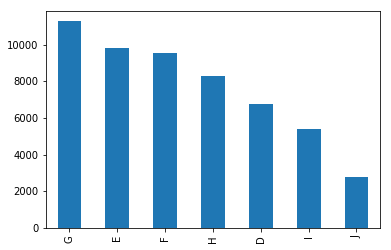

In [19]:
diamonds['color'].value_counts().plot(kind='bar')

Here we will ask the students to revisit the overview of the dataset. We will ask the to comment on the measure of variability.
We can see that there is little variation between the variables (since we're dealing with such a small scale this is normal). But we can see that there's a huge variation when we're dealing with the price variable. Thus we can say that even small changes between diamons can affect the price.

In [20]:
diamonds.describe()

,carat,clarity,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,3.051101,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540265
std,0.473986,1.647109,1.432514,2.234064,3988.734835,1.119670,1.140343,0.702667
min,0.200000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We will give them the code to plot a heatmap and a correlation matrix, since they don't know how to plot and they were asked already to create a function to calculate correlation and covariance.

We'll ask them to comment on the correlation matrix.

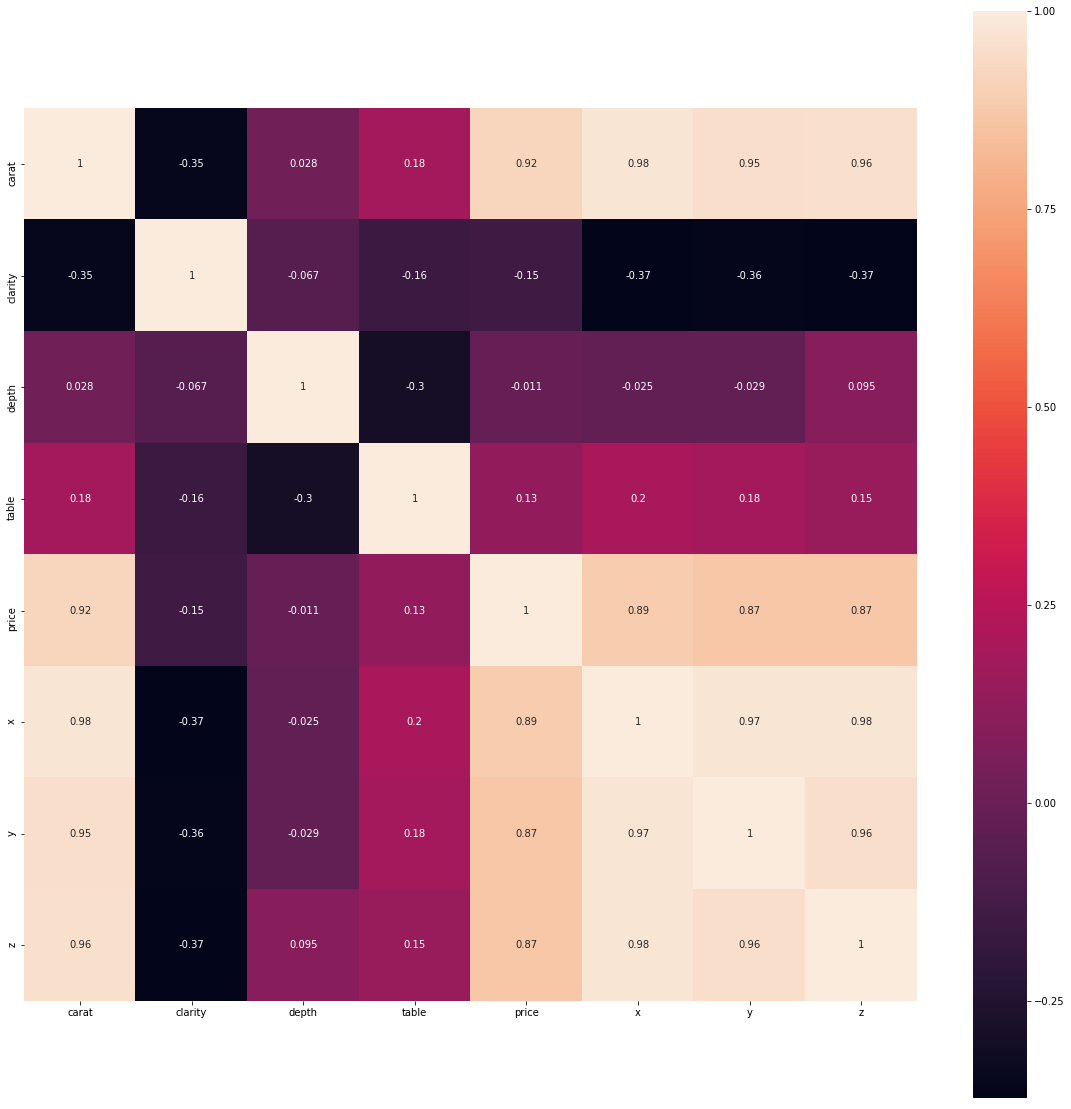

In [21]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True,square=True)

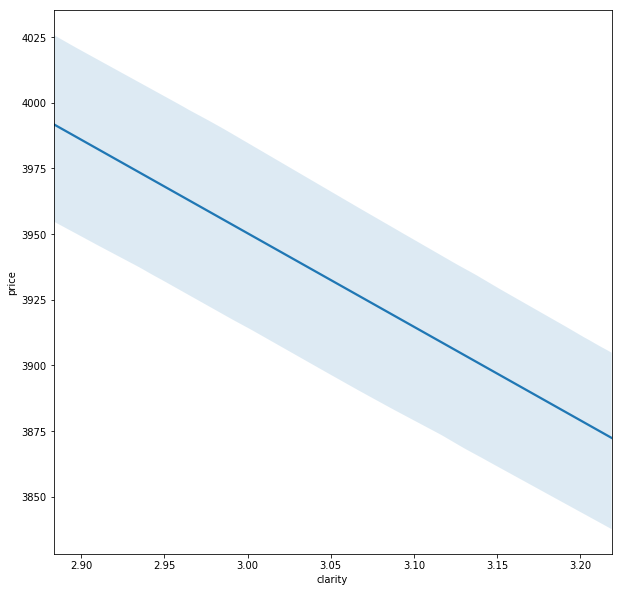

In [22]:
plt.figure(figsize=(10, 10))
j = sns.regplot(diamonds.clarity,diamonds.price, scatter=False)
axes = j.axes


In [23]:
diamonds.clarity

0        1
1        2
2        4
3        3
4        1
5        5
6        6
7        2
8        3
9        4
10       2
11       4
12       2
13       1
14       1
15       0
16       1
17       2
18       2
19       2
20       1
21       3
22       4
23       2
24       2
25       5
26       4
27       3
28       3
29       4
        ..
53910    2
53911    7
53912    6
53913    3
53914    4
53915    1
53916    2
53917    2
53918    4
53919    6
53920    3
53921    3
53922    4
53923    3
53924    3
53925    2
53926    2
53927    2
53928    1
53929    4
53930    2
53931    2
53932    3
53933    3
53934    2
53935    2
53936    2
53937    2
53938    1
53939    1
Name: clarity, Length: 53932, dtype: int64